# Movie Data Analysis

Microsoft wants in on the streaming movie market and has asked me to analyze movie data to see what their best course of action would be. So the plan is to import a number of dataframes regarding movie budgets, ticket sales, ratings, etc. I then need to ask and answer 3 questions:

What movies make the most money?
What movies lost the most money?
What Microsoft properties are best suited to become movies?
So here goes. Start by importing all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from bs4 import BeautifulSoup as bsoup
import requests
%matplotlib inline

In [4]:
gross=pd.read_csv('Data/bom.movie_gross.csv.gz')
imdb_rat=pd.read_csv('Data/imdb.title.ratings.csv.gz') 
rot_tom=pd.read_csv('Data/rt.movie_info.tsv.gz', delimiter = '\t')
budgets=pd.read_csv('Data/tn.movie_budgets.csv.gz')
tmdb=pd.read_csv('Data/tmdb.movies.csv.gz')

In [5]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


Most of these files don't have the data I'm really looking for. In fact, some of them don't really have much useable data at all. But the budgets and gross dataframes do, so let's work with them for a bit. The next step I want to take is to turn the date released into an actual date, and turn the dollar amounts into numbers I can use.

## Working with the data....

This budgets dataframe needs a little cleaning, mainly getting rid of the dollar signs, making those float numbers for easier sorting, and maybe chaning the release date to a datetime object.

In [11]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [12]:
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


That scientific notation is distracting, so I'm going to divide by a million and make things easier

In [14]:
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x/1000000)

In [15]:
budgets.sort_values(by=['domestic_gross'],ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747
43,44,2018-06-15,Incredibles 2,200.0,608.581744,1242.520711
74,75,2008-07-18,The Dark Knight,185.0,533.720947,1001.996207


In [16]:
budgets.sort_values(by=['worldwide_gross'],ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864
66,67,2015-04-03,Furious 7,190.0,353.007020,1518.722794
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125.0,381.193157,1341.693157


This data is clearly old. But for now, let's see what the actual profits were, by making a new column, "Worldwide_net". Which will be the worldwide_gross and subtracting the production_budget.

In [17]:
budgets['world_net']=budgets['worldwide_gross'] - budgets['production_budget']

In [18]:
budgets. head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2351.345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-200.237650
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,1072.413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,999.721747


So we'll create a new dataframe, 'budgets_wn', which is the budgets dataframe sorted by world net.

In [19]:
budgets_wn=budgets.sort_values(by=['world_net'],ascending=False)

In [20]:
budgets_wn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2351.345279
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,2008.208395
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864,1433.854864
66,67,2015-04-03,Furious 7,190.0,353.007020,1518.722794,1328.722794
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897,1292.935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125.0,381.193157,1341.693157,1216.693157
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224,1148.258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,1135.772799


So let's make another column 'dom_net', the domestic net profit:

In [21]:
budgets['dom_net']=budgets['domestic_gross'] - budgets['production_budget']

In [22]:
budgets_dn=budgets.sort_values(by=['dom_net'],ascending=False)
budgets_dn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net,dom_net
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220,630.662225
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224,1148.258224,500.059566
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,2008.208395,459.363944
3464,65,1977-05-25,Star Wars Ep. IV: A New Hope,11.0,460.998007,786.598007,775.598007,449.998007
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864,1433.854864,437.270625
3525,26,1982-06-11,ET: The Extra-Terrestrial,10.5,435.110554,792.965326,782.465326,424.610554
43,44,2018-06-15,Incredibles 2,200.0,608.581744,1242.520711,1042.520711,408.581744
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897,1292.935897,398.279547
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200,378.815482
692,93,2004-05-19,Shrek 2,70.0,441.226247,937.008132,867.008132,371.226247


Let's do some work on the 'gross' dataframe. Basically what was done to the budgets dataframe. First, we'll see what it looks like:

In [23]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


So there are a few null/missing values here, and the foreign_gross isn't a number. I'm going to leave the nulls for now, I'll deal with them if they become a problem.

In [24]:
gross['foreign_gross'] = gross['foreign_gross'].replace('[\,,]', '', regex=True).astype(float)
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [25]:
gross.sort_values(by=['domestic_gross'],ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


In [26]:
gross.sort_values(by=['foreign_gross'],ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


So, I'm not going to use this dataset. The numbers don't match the gross dataset, and it's missing some of the bigger movies of all time, like Avatar and Titanic. Which leads me to believe this dataset is incomplete and not worth using.

Next, I want to go back to the gross dataset, trim it down to just the top 10 movies, based on domestic gross.

In [29]:
gross_top=gross.sort_values(by=['total'],ascending=False).head(10)
gross_top['domestic_gross']=gross_top['domestic_gross']/1000000
gross_top.drop('year',axis =1,inplace=True)

In [30]:
gross_top[gross_top.columns[3:]] = gross_top[gross_top.columns[3:]].apply(lambda x: x/1000000)
gross_top

,title,studio,domestic_gross,foreign_gross,total
727,Marvel's The Avengers,BV,623.4,895.5,1518.9
1875,Avengers: Age of Ultron,BV,459.0,946.4,1405.4
3080,Black Panther,BV,700.1,646.9,1347.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381.0,960.5,1341.5
2758,Star Wars: The Last Jedi,BV,620.2,712.4,1332.6
3081,Jurassic World: Fallen Kingdom,Uni.,417.7,891.8,1309.5
1127,Frozen,BV,400.7,875.7,1276.4
2759,Beauty and the Beast (2017),BV,504.0,759.5,1263.5
3082,Incredibles 2,BV,608.6,634.2,1242.8
1128,Iron Man 3,BV,409.0,805.8,1214.8


Getting back to the budgets dataframe. Let's start making some visualizations. How about a nice graph of the top 10 highest grossing movies? I'll start by making a new dataframe of just the top 10 highest grossing (using worldwide gross)movies.

### Visualizations

In [31]:
budgets_top=budgets.sort_values(by=['worldwide_gross'],ascending=False).head(10)

Text(0, 0.5, ' ')

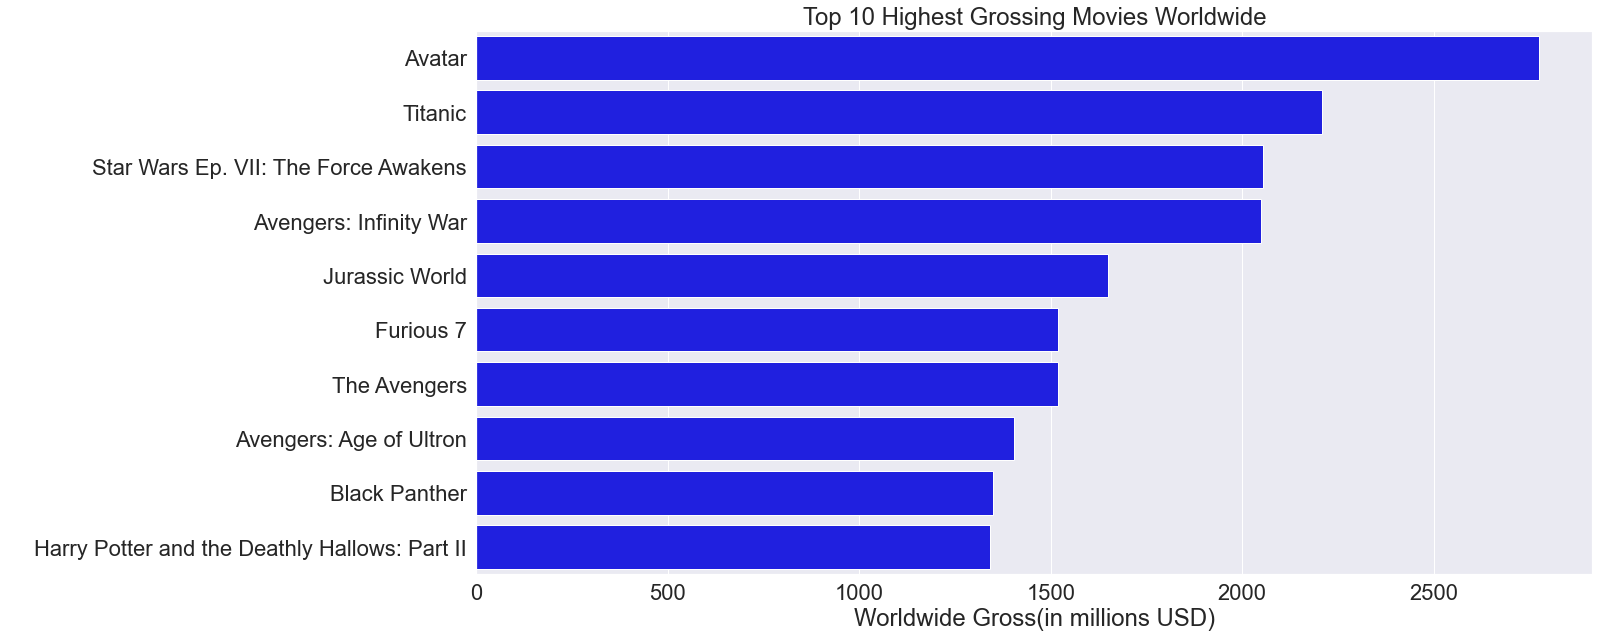

In [33]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="worldwide_gross", y="movie", data=budgets_top, color='blue')
plt.xlabel("Worldwide Gross(in millions USD)")
plt.title("Top 10 Highest Grossing Movies Worldwide")
plt.ylabel(" ")

I'm no expert or nothing, but that's a nice looking graph.

In [34]:
budgets_top_net=budgets_wn.sort_values(by=['world_net'],ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Movies Worldwide Net')

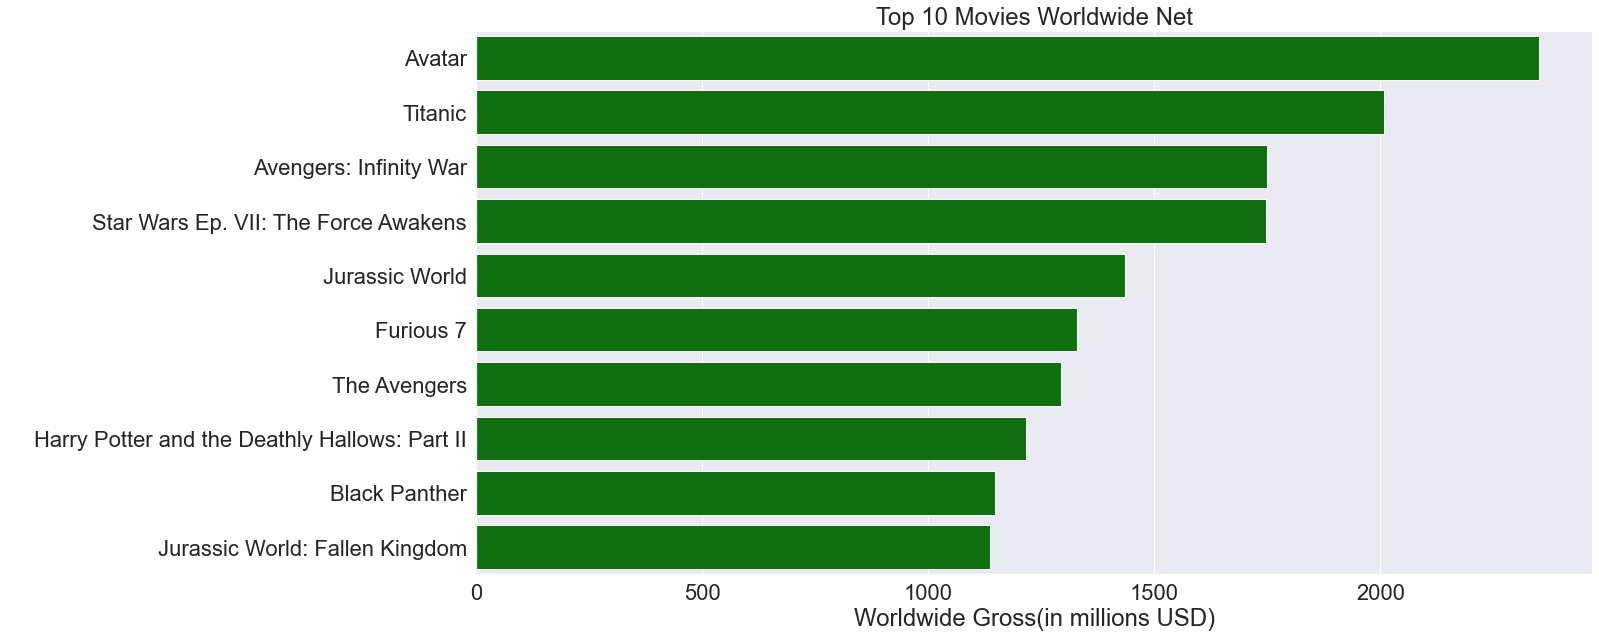

In [35]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="world_net", y="movie", data=budgets_top_net, color='green')
plt.xlabel("Worldwide Gross(in millions USD)")
plt.ylabel(" ")
plt.title("Top 10 Movies Worldwide Net")

 So there's definitely a trend here, sci-fi fantasy, and sequels. For contract, let's look at the worst movies in the budgets dataframe.

In [36]:
budgets_net=budgets.sort_values(by=['world_net'],ascending=False)
budgets_net.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net,dom_net
477,78,2017-04-21,The Promise,90.0,8.224288,10.551417,-79.448583,-81.775712
535,36,2020-02-21,Call of the Wild,82.0,0.000000,0.000000,-82.000000,-82.000000
479,80,2017-12-13,Bright,90.0,0.000000,0.000000,-90.000000,-90.000000
480,81,2019-12-31,Army of the Dead,90.0,0.000000,0.000000,-90.000000,-90.000000
404,5,2002-08-16,The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005,-95.588898
352,53,2001-04-27,Town & Country,105.0,6.712451,10.364769,-94.635231,-98.287549
341,42,2019-06-14,Men in Black: International,110.0,3.100000,3.100000,-106.900000,-106.900000
193,94,2011-03-11,Mars Needs Moms,150.0,21.392758,39.549758,-110.450242,-128.607242
194,95,2020-12-31,Moonfall,150.0,0.000000,0.000000,-150.000000,-150.000000
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-200.237650,-307.237650


So there are a few movies here that have made no money.That can't be right. Army of the Dead hasn't been released yet, Bright is a Netflix original (so it's tough to know how much money it actually made), and a quick google search says that Call of the Wild actually made $107 million worldwide. So it's clear that for whatever reason, the numbers were not included in the dataframe. So I think it would simply be best for me to remove them entirely.

In [37]:
budgets_net=budgets_net[budgets_net.domestic_gross != 0.0]
budgets_net.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net,dom_net
669,70,2001-02-23,Monkeybone,75.0,5.409517,5.409517,-69.590483,-69.590483
300,1,2010-12-17,How Do You Know?,120.0,30.212620,49.628177,-70.371823,-89.787380
435,36,1995-12-22,Cutthroat Island,92.0,10.017322,18.517322,-73.482678,-81.982678
607,8,2005-09-02,A Sound of Thunder,80.0,1.900451,6.300451,-73.699549,-78.099549
477,78,2017-04-21,The Promise,90.0,8.224288,10.551417,-79.448583,-81.775712
404,5,2002-08-16,The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005,-95.588898
352,53,2001-04-27,Town & Country,105.0,6.712451,10.364769,-94.635231,-98.287549
341,42,2019-06-14,Men in Black: International,110.0,3.100000,3.100000,-106.900000,-106.900000
193,94,2011-03-11,Mars Needs Moms,150.0,21.392758,39.549758,-110.450242,-128.607242
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-200.237650,-307.237650


In [38]:
budgets_bot=budgets_net.tail(10)

Text(0.5, 1.0, 'Bottom 10 Movies Worldwide Net')

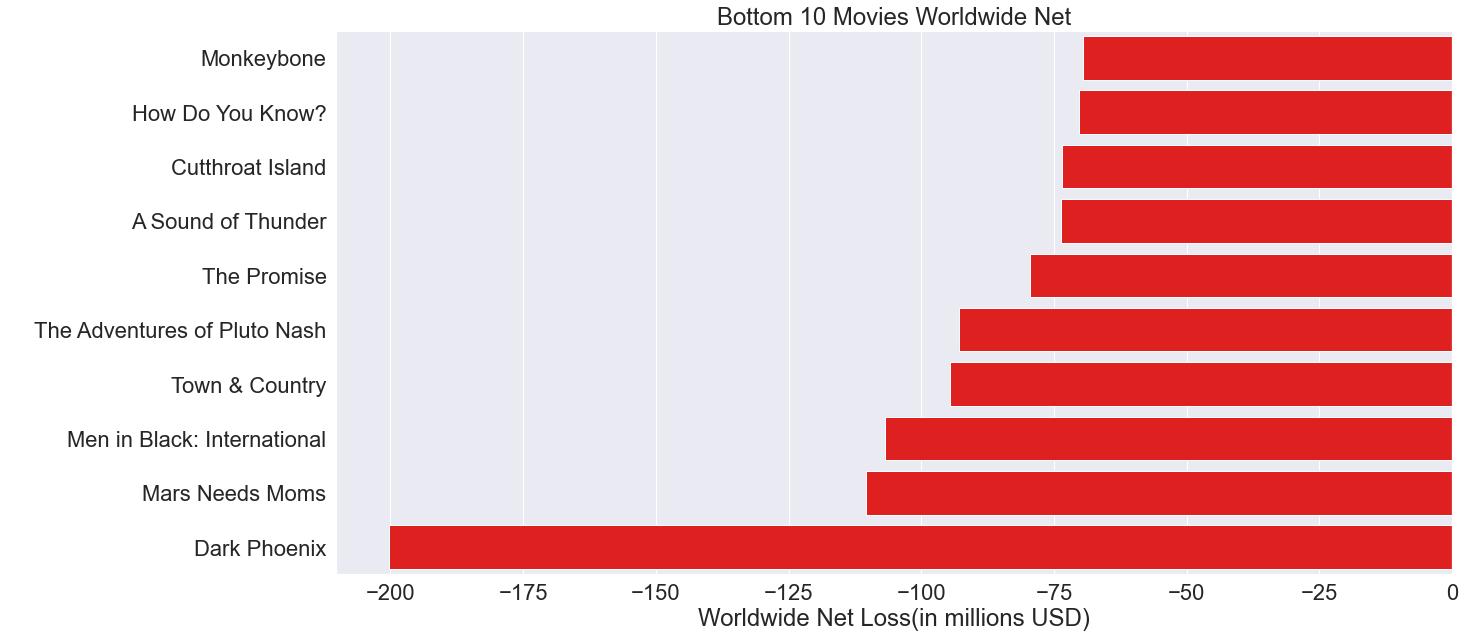

In [39]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="world_net", y="movie", data=budgets_bot, color='red')
plt.xlabel("Worldwide Net Loss(in millions USD)")
plt.ylabel(" ")
plt.title("Bottom 10 Movies Worldwide Net")

The problem I'm seeing with these files is that they aren't up to date. I think that's why there is the missing data. The other problem is that it's cut off. Take the above graph, that's simply the bottom 10 movies in that dataframe.

While this graph also looks pretty good, I think I'd like it better if it went the other direction. But for now let's get some more data. Let's grab some data from wikipedia's article on the biggest box office bombs.

## More (and better) data...

Let's do a little web-scraping and see if we can get some good data on box office bombs. Oh look, Wikipedia has some. And I gave them $5 one time, so I'm pretty sure that means I'm entitled to all of it.

In [40]:
resp=requests.get("https://en.wikipedia.org/wiki/List_of_biggest_box-office_bombs")

In [41]:
soup= bsoup(resp.text)

In [43]:
bomb_table=soup.find('table', {'class':'wikitable'})

In [44]:
bombs= pd.read_html(bomb_table.prettify())[0]

In [45]:
bombs.head()

Title  Year  \
                                  Title  Year   
0                      The 13th Warrior  1999   
1                              47 Ronin  2013   
2    The Adventures of Baron Munchausen  1988   
3          The Adventures of Pluto Nash  2002   
4  The Adventures of Rocky & Bullwinkle  2000   

  Net production budget  (millions) Worldwide gross  (millions)  \
  Net production budget  (millions) Worldwide gross  (millions)   
0                          $100–160                       $61.7   
1                          $175–225                      $151.8   
2                             $46.6                        $8.1   
3                              $100                        $7.1   
4                          $76–98.6                       $35.1   

  Estimated loss  (millions)                          Ref.  
                     Nominal Adjusted for inflation [nb 1]  
0                    $69–129               $107–200  [# 1]  
1                        $97                   $108  [# 2]  
2                      $38.5                    $84  [# 3]  
3                        $96                   $138  [# 4]  
4                      $63.5                    $95  [# 5]

Nice. Except, not nice. It's a bit messy. We need to get rid of that second top row of titles, and that Ref column can probably just disappear and we won't miss it.

In [46]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   (Title, Title)                                                          113 non-null    object
 1   (Year, Year)                                                            113 non-null    int64 
 2   (Net production budget  (millions), Net production budget  (millions))  113 non-null    object
 3   (Worldwide gross  (millions), Worldwide gross  (millions))              113 non-null    object
 4   (Estimated loss  (millions), Nominal)                                   113 non-null    object
 5   (Estimated loss  (millions), Adjusted for inflation)                    113 non-null    object
 6   (Ref., [nb 1])                                                          113 non-null    obj

In [48]:
bombs.columns

MultiIndex([(                            'Title', ...),
            (                             'Year', ...),
            ('Net production budget  (millions)', ...),
            (      'Worldwide gross  (millions)', ...),
            (       'Estimated loss  (millions)', ...),
            (       'Estimated loss  (millions)', ...),
            (                             'Ref.', ...)],
           )

Let's neaten up those column names.

In [49]:
names=['title','year','net_prod_budget','WW_Gross','Est_loss_nom','Est_loss_adj','Ref']

In [50]:
bombs.columns=names

In [51]:
bombs

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj,Ref
0,The 13th Warrior,1999,$100–160,$61.7,$69–129,$107–200,[# 1]
1,47 Ronin,2013,$175–225,$151.8,$97,$108,[# 2]
2,The Adventures of Baron Munchausen,1988,$46.6,$8.1,$38.5,$84,[# 3]
3,The Adventures of Pluto Nash,2002,$100,$7.1,$96,$138,[# 4]
4,The Adventures of Rocky & Bullwinkle,2000,$76–98.6,$35.1,$63.5,$95,[# 5]
...,...,...,...,...,...,...,...
108,The Wolfman,2010,$150,$139.8,$76,$90,[# 109]
109,Wonder Woman 1984,2020,$200,$166.5,$100,$100,[# 110]
110,A Wrinkle in Time,2018,$125,$133.4,$130.6,$135,[# 111]
111,xXx: State of the Union,2005,$113.1,$71,$78,$103,[# 112]


Ref column, remember when I said I'd drop you last. I lied

In [52]:
bombs.drop('Ref', axis=1, inplace=True)

In [53]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,$100–160,$61.7,$69–129,$107–200
1,47 Ronin,2013,$175–225,$151.8,$97,$108
2,The Adventures of Baron Munchausen,1988,$46.6,$8.1,$38.5,$84
3,The Adventures of Pluto Nash,2002,$100,$7.1,$96,$138
4,The Adventures of Rocky & Bullwinkle,2000,$76–98.6,$35.1,$63.5,$95


Good, now let's try to make these actual numbers instead of objects. I'm hoping it won't interpret the '-' as a minus sign and then subtract those numbers automatically. But first off, let's dump the '$'.

In [54]:
bombs['Est_loss_adj'] = bombs['Est_loss_adj'].replace('[\$,]', '', regex=True)
bombs['Est_loss_nom'] = bombs['Est_loss_nom'].replace('[\$,]', '', regex=True)
bombs['WW_Gross'] = bombs['WW_Gross'].replace('[\$,]', '', regex=True)
bombs['net_prod_budget'] = bombs['net_prod_budget'].replace('[\$,]', '', regex=True)
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,100–160,61.7,69–129,107–200
1,47 Ronin,2013,175–225,151.8,97,108
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,84
3,The Adventures of Pluto Nash,2002,100,7.1,96,138
4,The Adventures of Rocky & Bullwinkle,2000,76–98.6,35.1,63.5,95


Next step, changing these ranges of numbers into actual numbers. The simplest thing to do would be just to make it the average of the 2. But that means we have to split them up, then add them, then divide by 2.

In [55]:
len(bombs['net_prod_budget'][0])

7

This tells us we can go through the list, split the object at the '-'. But then we need to change them into floats, then take the mean. So let's break that into simpler steps. 
Step 1: Split at the '-'

In [57]:
bombs['net_prod_budget'][0].split('–')

['175', '225']

Step 2: Make a list of those split numbers

In [58]:
rang=bombs['net_prod_budget'][0].split('–')
rang

['100', '160']

Step 3: Strings into floats

In [59]:
rang=[float(i) for i in rang]
rang

[100.0, 160.0]

Step 4: The mean, or average, same diff.

In [60]:
rang_mean=sum(rang)/len(rang)
rang_mean

130.0

Step 5: Back into the dataframe

In [61]:
bombs['net_prod_budget'][0]=rang_mean

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130,61.7,69–129,107–200
1,47 Ronin,2013,175–225,151.8,97,108
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,84
3,The Adventures of Pluto Nash,2002,100,7.1,96,138
4,The Adventures of Rocky & Bullwinkle,2000,76–98.6,35.1,63.5,95


Glorious. Sure we get a warning, but it worked. So now we need to combine all this into a function and run it through every column. But only if the column contains a dash. If it doesn't contain a dash, it just needs to convert the number to a float. Ok, let's take a step back: let's simply write a for loop to go through a particular column. Then we can write a function to go through an entire dataframe.

In [63]:
numb=list(range(1, len(bombs['net_prod_budget'])))

In [64]:
for x in numb:
    if '–' not in bombs['net_prod_budget'][x]:
        bombs['net_prod_budget'][x]=float(bombs['net_prod_budget'][x])
    else:
        rangx=bombs['net_prod_budget'][x].split('–')
        rangx=[float(i) for i in rangx]
        rangx_mean=sum(rangx)/len(rangx)
        bombs['net_prod_budget'][x]=rangx_mean

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130,61.7,69–129,107–200
1,47 Ronin,2013,200,151.8,97,108
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,84
3,The Adventures of Pluto Nash,2002,100,7.1,96,138
4,The Adventures of Rocky & Bullwinkle,2000,87.3,35.1,63.5,95


Again, some warnings, but this worked.

In [66]:
bombs['net_prod_budget']=bombs['net_prod_budget'].astype(float)

We'll make a function, called 'changeover', that'll take in a single variable (in this case, it'll be the column value) then it'll remove the dash and change it to the mean, if it's a range of values. If not, it'll remove a '+', if none of those are present, it'll just change the number to a float.

In [67]:
def changeover (var1):
    if '–' in var1:
        rangx=var1.split('–')
        rangx=[float(i) for i in rangx]
        rangx_mean=sum(rangx)/len(rangx)
        var1=rangx_mean        
    elif '+' in var1:
        rangx=var1.split('+')
        var1=float(rangx[0])
    else:
        var1=float(var1)
    return var1

In [71]:
bombs['Est_loss_nom'] = bombs['Est_loss_nom'].map(changeover)

No errors, so it's possible it worked.

In [72]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130.0,61.7,99.0,153.5
1,47 Ronin,2013,200.0,151.8,97.0,108.0
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,84.0
3,The Adventures of Pluto Nash,2002,100.0,7.1,96.0,138.0
4,The Adventures of Rocky & Bullwinkle,2000,87.3,35.1,63.5,95.0


In [69]:
bombs['WW_Gross'] = bombs['WW_Gross'].map(changeover)
bombs['Est_loss_adj'] = bombs['Est_loss_adj'].map(changeover)

In [73]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            113 non-null    object 
 1   year             113 non-null    int64  
 2   net_prod_budget  113 non-null    float64
 3   WW_Gross         113 non-null    float64
 4   Est_loss_nom     113 non-null    float64
 5   Est_loss_adj     113 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.4+ KB


In [74]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130.0,61.7,99.0,153.5
1,47 Ronin,2013,200.0,151.8,97.0,108.0
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,84.0
3,The Adventures of Pluto Nash,2002,100.0,7.1,96.0,138.0
4,The Adventures of Rocky & Bullwinkle,2000,87.3,35.1,63.5,95.0


THE BIG BRAIN AM WINNING AGAIN!!! I ARE THE GREETEST!!! Sorry, just got a little carried away that that had worked. Now let's try sorting by Est Loss(nominal, I'm not worried about adjusted)

In [75]:
bombs_nom=bombs.sort_values(by=['Est_loss_nom'],ascending=False).head(10)
bombs_nom.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
66,The Lone Ranger,2013,237.5,260.5,175.0,194.5
72,Mortal Engines,2018,110.0,83.7,174.8,180.0
59,John Carter,2012,263.7,284.1,157.0,177.0
13,Battleship,2012,214.5,303.0,150.0,169.0
73,Mulan,2020,200.0,66.8,147.0,147.0


I know I just said I wasn't interested in adjusted, but now I am.

In [76]:
bombs_adj=bombs.sort_values(by=['Est_loss_adj'],ascending=False).head(10)
bombs_adj

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
66,The Lone Ranger,2013,237.5,260.5,175.0,194.5
72,Mortal Engines,2018,110.0,83.7,174.8,180.0
25,Cutthroat Island [nb 2],1995,98.0,18.3,105.0,178.0
59,John Carter,2012,263.7,284.1,157.0,177.0
91,Sinbad: Legend of the Seven Seas,2003,60.0,80.8,125.0,176.0
13,Battleship,2012,214.5,303.0,150.0,169.0
0,The 13th Warrior,1999,130.0,61.7,99.0,153.5
101,Titan A.E.,2000,82.5,36.8,100.0,150.0
73,Mulan,2020,200.0,66.8,147.0,147.0
62,King Arthur: Legend of the Sword,2017,175.0,148.7,133.6,141.0


Text(0.5, 1.0, '10 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)')

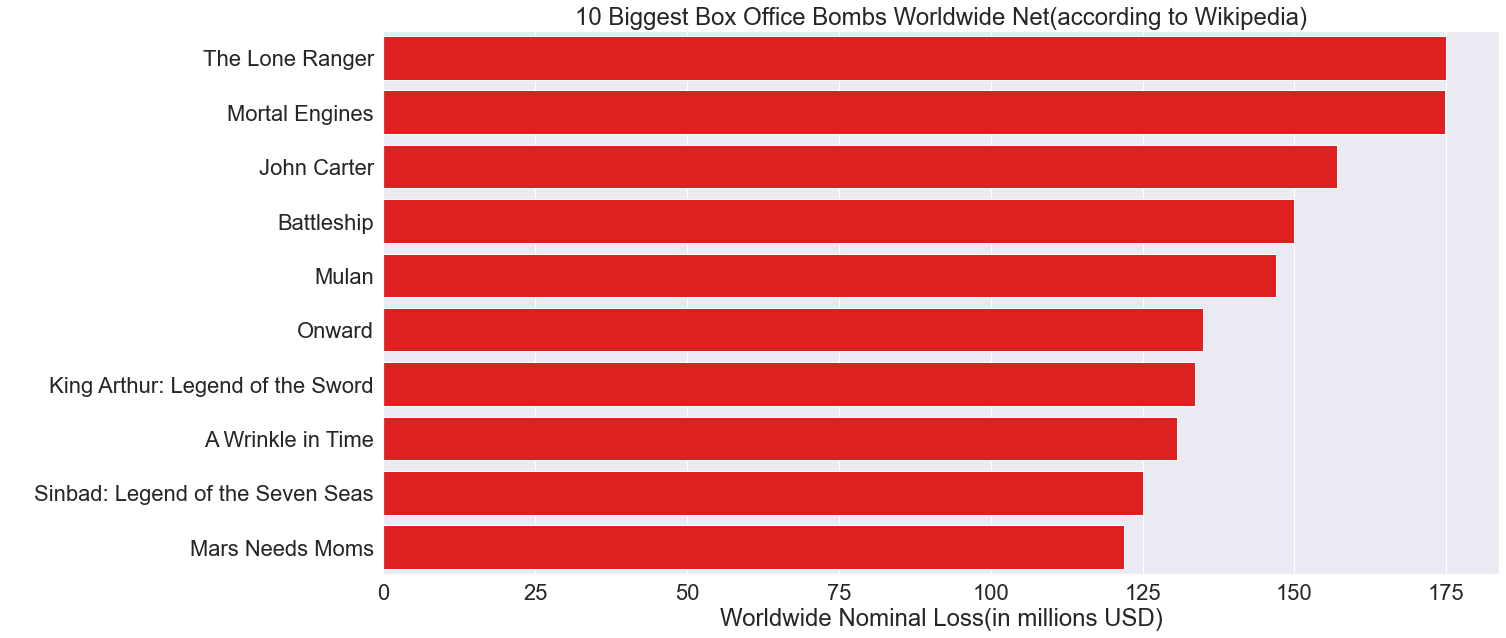

In [77]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Est_loss_nom", y="title", data=bombs_nom, color='red')
plt.xlabel("Worldwide Nominal Loss(in millions USD)")
plt.ylabel(" ")
plt.title("10 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)")

## More from Wikipedia

I really liked that updated data. So I'm going to grab some more.

In [78]:
resp2= requests.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films")

In [79]:
soup2= bsoup(resp2.text)

In [80]:
tops_table=soup2.find('table', {'class':'wikitable'})

In [81]:
tops= pd.read_html(tops_table.prettify())[0]

In [82]:
tops.head()

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avatar,"$2,847,246,203",2009,[# 1] [# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3] [# 4]
2,3,1,Titanic,"$2,187,425,379",1997,[# 5] [# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7] [# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9] [# 10]


Again, I don't need that references column.

In [83]:
tops.drop('Reference(s)', axis=1,inplace=True)

In [84]:
tops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


50 movies is a lot to display, so I think I'll trim it down to 15.

In [85]:
top_fifteen=tops.head(15)

In [86]:
top_fifteen['Worldwide gross'] = top_fifteen['Worldwide gross'].replace('[\$,]', '', regex=True)
top_fifteen['Worldwide gross']= top_fifteen['Worldwide gross'].astype(float)
top_fifteen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             15 non-null     int64  
 1   Peak             15 non-null     object 
 2   Title            15 non-null     object 
 3   Worldwide gross  15 non-null     float64
 4   Year             15 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 728.0+ bytes


D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, '15 Biggest Movies All Time (according to Wikipedia)')

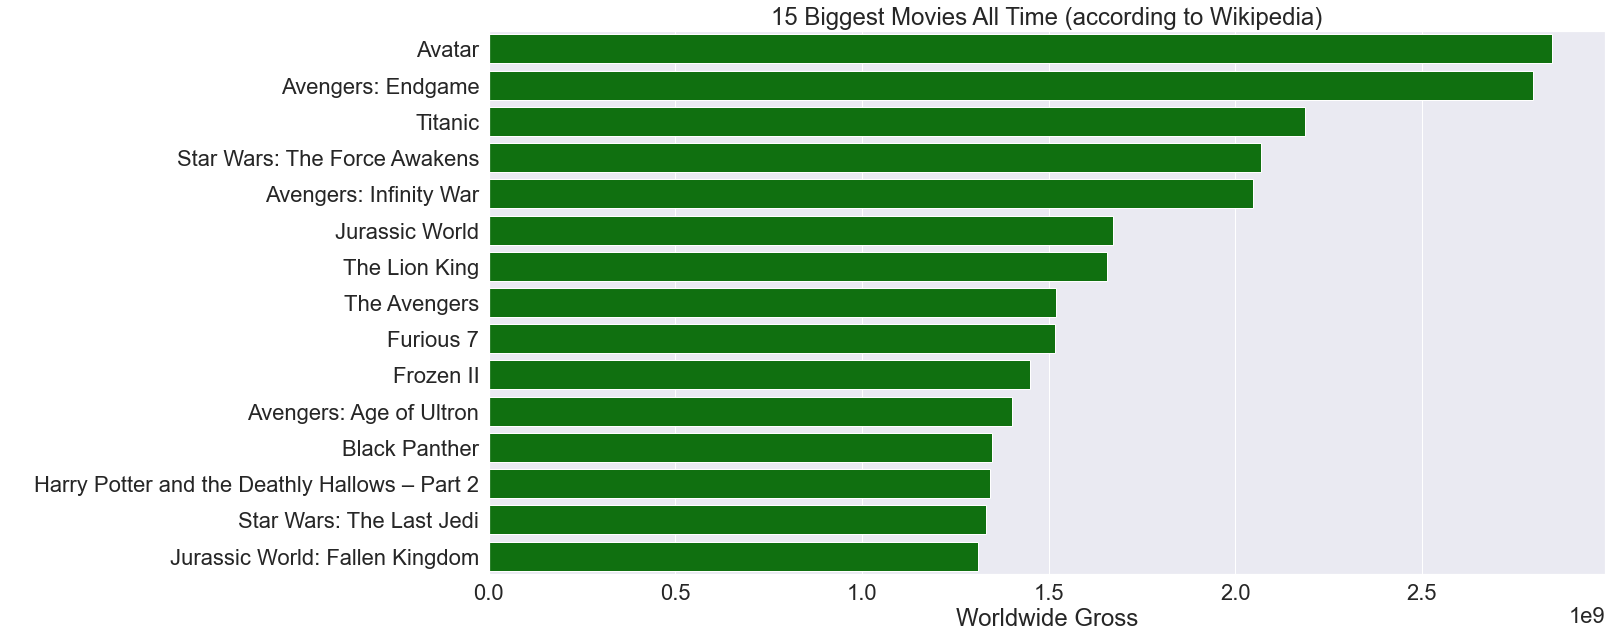

In [87]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="Title", data=top_fifteen, color='green')
plt.xlabel("Worldwide Gross")
plt.ylabel(" ")
plt.title("15 Biggest Movies All Time (according to Wikipedia)")

I forgot to divide by 1 million.

In [88]:
top_fifteen['Worldwide gross'] = top_fifteen['Worldwide gross']/1000000

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
top_fifteen

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avatar,2847.246203,2009
1,2,1,Avengers: Endgame,2797.501328,2019
2,3,1,Titanic,2187.425379,1997
3,4,3,Star Wars: The Force Awakens,2068.223624,2015
4,5,4,Avengers: Infinity War,2048.359754,2018
5,6,3,Jurassic World,1671.713208,2015
6,7,7,The Lion King,1656.943394,2019
7,8,3,The Avengers,1518.812988,2012
8,9,4,Furious 7,1516.045911,2015
9,10,10,Frozen II,1450.026933,2019


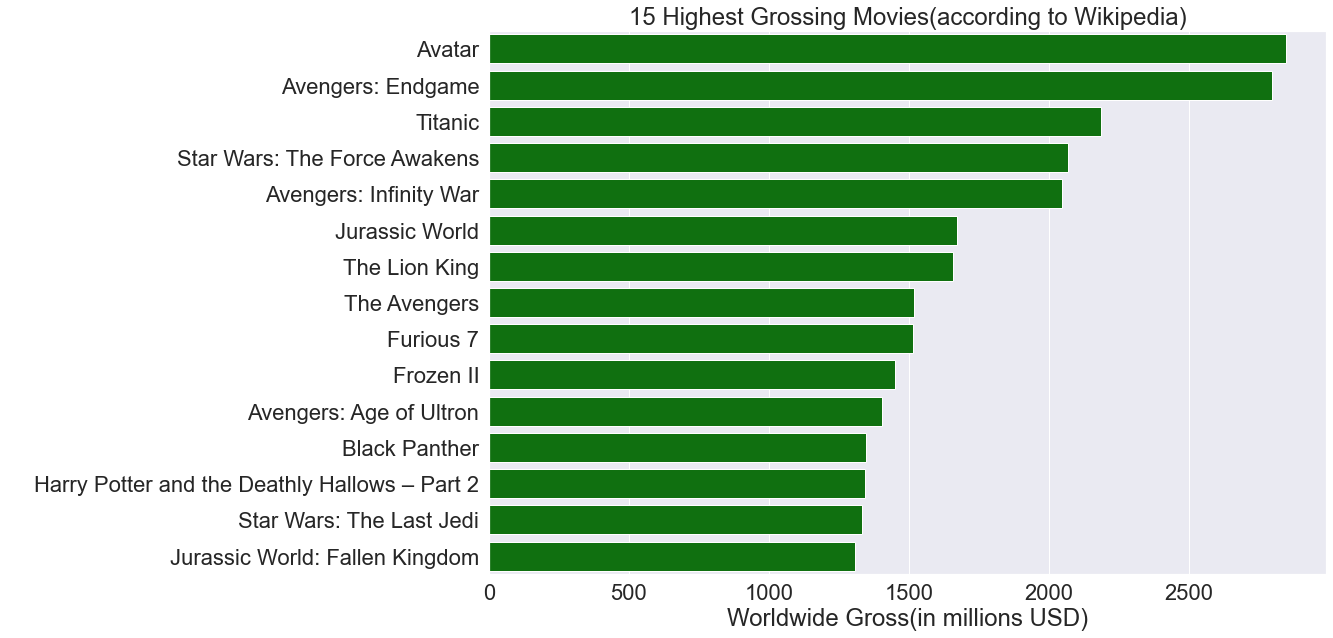

In [90]:
fig,ax=plt.subplots(figsize=(15,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="Title", data=top_fifteen, color='green')
plt.xlabel("Worldwide Gross(in millions USD)")
plt.ylabel(" ")
plt.title("15 Highest Grossing Movies(according to Wikipedia)")
plt.savefig('c:/users/Daniel/Documents/top_fifteen.png')

So we have 4 visualizations technically. Really only 2 (best and worst movies). Now we need to make some conclusions about this data.

Obviously, the biggest conclusion is that sequels do better. Specifically, sequels in the sci-fi/fantasy genre are the way to go. 11 of the top 15 are sequels (you could make the case for 12, because The Lion King is a remake of the animated film, which is sort of a sequel). So let's see if there's anything Microsoft can use to capitalize on this. But first, I want to go back real quick and look at the 15 biggest bombs, to see if any of them are sequels.

In [91]:
bombs_fift=bombs.sort_values(by=['Est_loss_nom'],ascending=False).head(15)
bombs_fift

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
66,The Lone Ranger,2013,237.5,260.5,175.00,194.5
72,Mortal Engines,2018,110.0,83.7,174.80,180.0
59,John Carter,2012,263.7,284.1,157.00,177.0
13,Battleship,2012,214.5,303.0,150.00,169.0
73,Mulan,2020,200.0,66.8,147.00,147.0
76,Onward,2020,187.5,142.0,135.00,135.0
62,King Arthur: Legend of the Sword,2017,175.0,148.7,133.60,141.0
110,A Wrinkle in Time,2018,125.0,133.4,130.60,135.0
91,Sinbad: Legend of the Seven Seas,2003,60.0,80.8,125.00,176.0
68,Mars Needs Moms,2011,150.0,39.0,122.00,140.5


Text(0.5, 1.0, '15 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)')

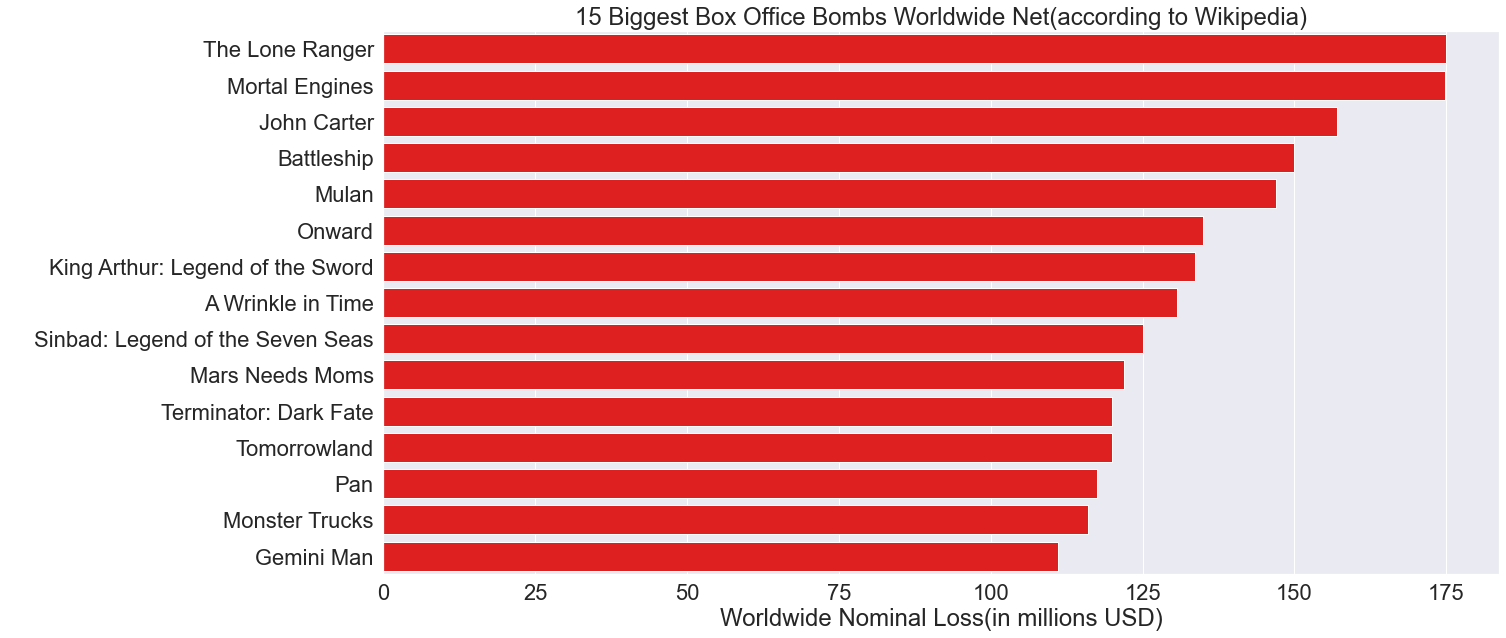

In [92]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Est_loss_nom", y="title", data=bombs_fift, color='red')
plt.xlabel("Worldwide Nominal Loss(in millions USD)")
plt.ylabel(" ")
plt.title("15 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)")

So this does help further my point about sequels. Only 2 of the 15 movies are sequels. So now let's move on to Microsoft, and what it already has that can be used as a movie.

## Microsoft (and game) data

I wasn't able to find any specific data table anywhere of Microsoft's most profitable franchises, so I compiled my own data. So after scouring the internet, I came across a wikipedia article of the most profitable video game franchises. But since only a few were owned by microsoft, I figured it was easier to just copy the data by hand into a dataframe than to parse all the data and find some suitable entries.

In [93]:
micro_franchises= {'title': ['Elder Scrolls','Halo','Gears of War','Fallout'], 'total_copies_sold':[59,70,26,38],
                   'total_revenue':[3.05,5.0,1.0,1.64]}

In [94]:
micro_fran=pd.DataFrame(micro_franchises,columns=['title','total_copies_sold','total_revenue'])

In [95]:
micro_fran

,title,total_copies_sold,total_revenue
0,Elder Scrolls,59,3.05
1,Halo,70,5.00
2,Gears of War,26,1.00
3,Fallout,38,1.64


I forgot to add a column for games in the series, since that will have a definite impact on the total revenue.

In [96]:
micro_fran['games_in_series']=[5,7,5,6]

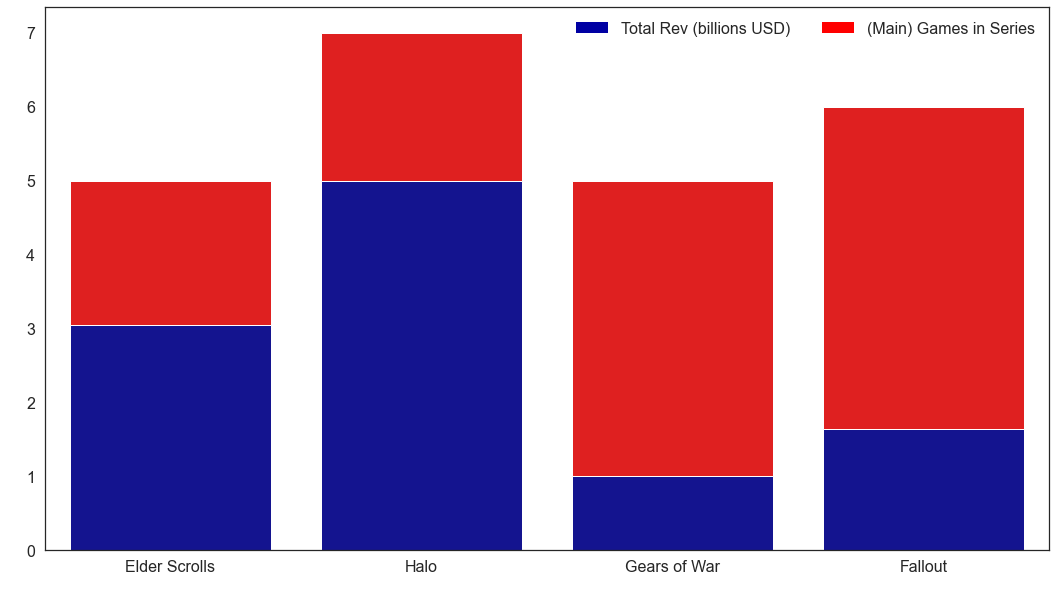

In [97]:
sb.set_style("white")
sb.set_context({"figure.figsize": (18, 10)})
sb.barplot(x = micro_fran.title, y = micro_fran.games_in_series, color = "red")
bottom_plot = sb.barplot(x = micro_fran.title, y = micro_fran.total_revenue, color = "#0000A3")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Total Rev (billions USD)', '(Main) Games in Series'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
plt.ylabel(" ")
plt.xlabel(" ")
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

So this gives a sense of how profitable these franchises are. So even tough Halo sold $2 Billion more than it's closest competitor (Elder Scrolls), that can be attributed to the fact that there are 2 more Halo main games. But it seems like Halo or Elder Scrolls would be the way to go. So now let's just make a simple graph for the copies sold. I went through all the trouble of finding these numbers, no reason to keep them to myself.

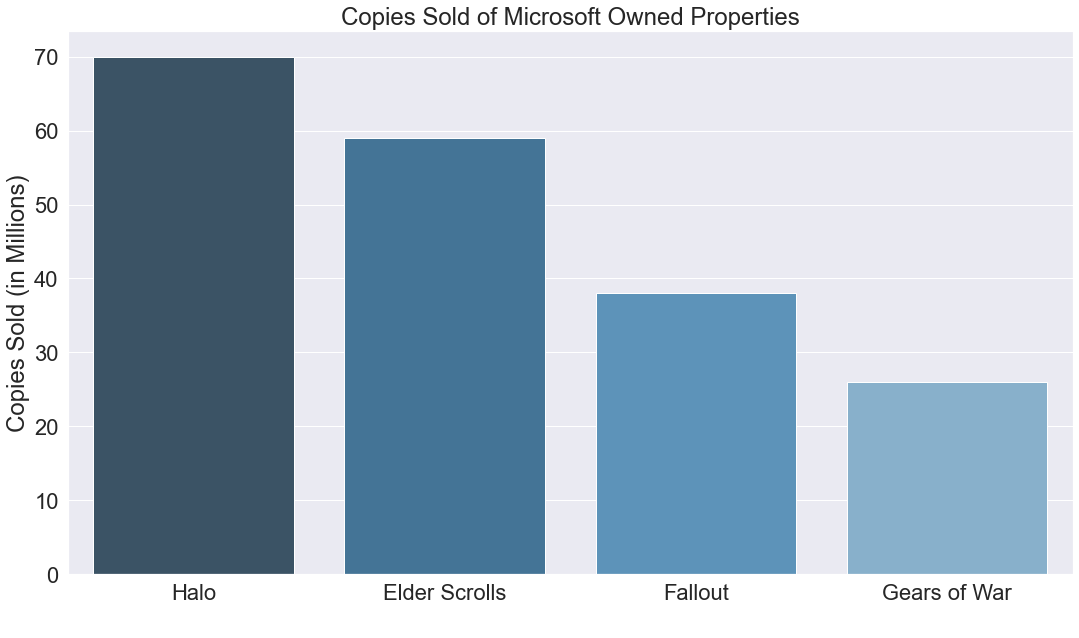

In [98]:
micro_copies=micro_fran.sort_values(by=['total_copies_sold'],ascending=False)
sb.set(font_scale=2) 
sb.barplot(x = micro_copies.title, y = micro_copies.total_copies_sold, palette="Blues_d")
plt.xlabel(" ")
plt.ylabel("Copies Sold (in Millions)")
plt.title("Copies Sold of Microsoft Owned Properties")
plt.show()

That's another nice looking graph. So we've established that there are some very profitable Microsoft properties out there. Even changed the color palette just to be different. From what I know of these series, Elder Scrolls and Fallout are more character driven, whereas Halo and Gear of War are more action driven. So that would suggest that Elder Scrolls and Fallout have more in terms of story available. Of course there are also a library of Halo books out there to pick from for a movie. There is also the issue of Elder Scrolls being viewed as too similar to the Netflix series "The Witcher". However that doesn't necessarily mean that an Elder Scrolls movie (or series) would be a failure. Deep Impact came out May 8, 1998, almost 2 months prior to Armageddon (June 30, 1998), but Armageddon did better at the box office (349.5MM vs 553.7MM) although when you consider the budget (75MM vs 140MM), Deep Impact had a better ROI.

### Video Game Movies

Let's shift gears a little, and start looking at video game franchises turned into movies. Again, I decided to manually create a dataframe for this, and then make a nice looking graph as well.

In [99]:
video_game_prop={'title':['Warcraft','Detective Pikachu','Rampage','The Angry Birds Movie','Prince Of Persia: The Sands Of Time',
                         'Resident Evil: The Final Chapter','Sonic The Hedgehog','Resident Evil: Afterlife','Lara Croft: Tomb Raider',
                         'Tomb Raider'],
                 'year':[2016,2019,2018,2016,2010,2016,2020,2010,2001,2018],
                 'ww_gross':[439,433,428,352,336,314,306,300,274,274]}

In [100]:
vg_fran=pd.DataFrame(video_game_prop,columns=['title','year','ww_gross'])

In [101]:
vg_fran

,title,year,ww_gross
0,Warcraft,2016,439
1,Detective Pikachu,2019,433
2,Rampage,2018,428
3,The Angry Birds Movie,2016,352
4,Prince Of Persia: The Sands Of Time,2010,336
5,Resident Evil: The Final Chapter,2016,314
6,Sonic The Hedgehog,2020,306
7,Resident Evil: Afterlife,2010,300
8,Lara Croft: Tomb Raider,2001,274
9,Tomb Raider,2018,274


Text(0.5, 1.0, '10 Biggest Video Game Movies All Time')

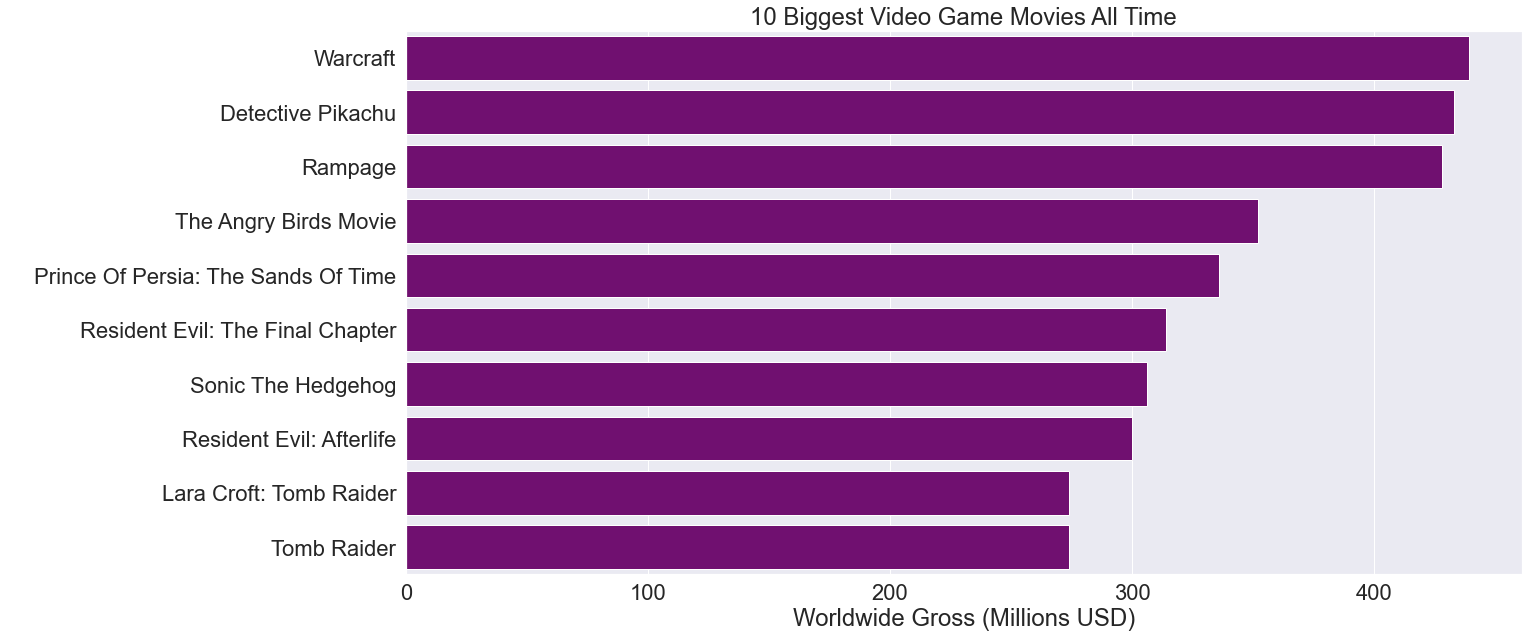

In [102]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="ww_gross", y="title", data=vg_fran, color='purple')
plt.xlabel("Worldwide Gross (Millions USD)")
plt.ylabel(" ")
plt.title("10 Biggest Video Game Movies All Time")

Ok, so there's evidence here that there is money in video game based movies, really just about any video game. Also, there are 2 Resident Evil movies on the list. That goes to my earlier theory that sequels are the best way to make money in movies.So for a third time, I decided to compile data on Resident Evil movies.

In [103]:
res_evil_movies={'title':['The Final Chapter','Retribution','Afterlife','Extinction',
                          'Apocalypse','Resident Evil'],'year':[2017,2012,2010,2007,2004,2002],
                'prod_budget':[40.0,65.0,57.5,45.0,50.0,35.0],
                'ww_gross':[314.1,240.6,295.9,149.9,125.2,103.8]}

In [104]:
re_fran=pd.DataFrame(res_evil_movies,columns=['title','year','prod_budget','ww_gross'])

In [105]:
re_fran

,title,year,prod_budget,ww_gross
0,The Final Chapter,2017,40.0,314.1
1,Retribution,2012,65.0,240.6
2,Afterlife,2010,57.5,295.9
3,Extinction,2007,45.0,149.9
4,Apocalypse,2004,50.0,125.2
5,Resident Evil,2002,35.0,103.8


Ok, so here's another dataframe containing info on the Resident Evil movie franchise. It's certainly the highest grossing franchise based on a video game (live-action), also I do believe it will show a trend that the sequels make more money than the previous movie.

In [106]:
re_fran_yr=re_fran.sort_values(by=['year'],ascending=False)
re_fran_yr

,title,year,prod_budget,ww_gross
0,The Final Chapter,2017,40.0,314.1
1,Retribution,2012,65.0,240.6
2,Afterlife,2010,57.5,295.9
3,Extinction,2007,45.0,149.9
4,Apocalypse,2004,50.0,125.2
5,Resident Evil,2002,35.0,103.8


Text(0.5, 1.0, 'Resident Evil movie gross by year')

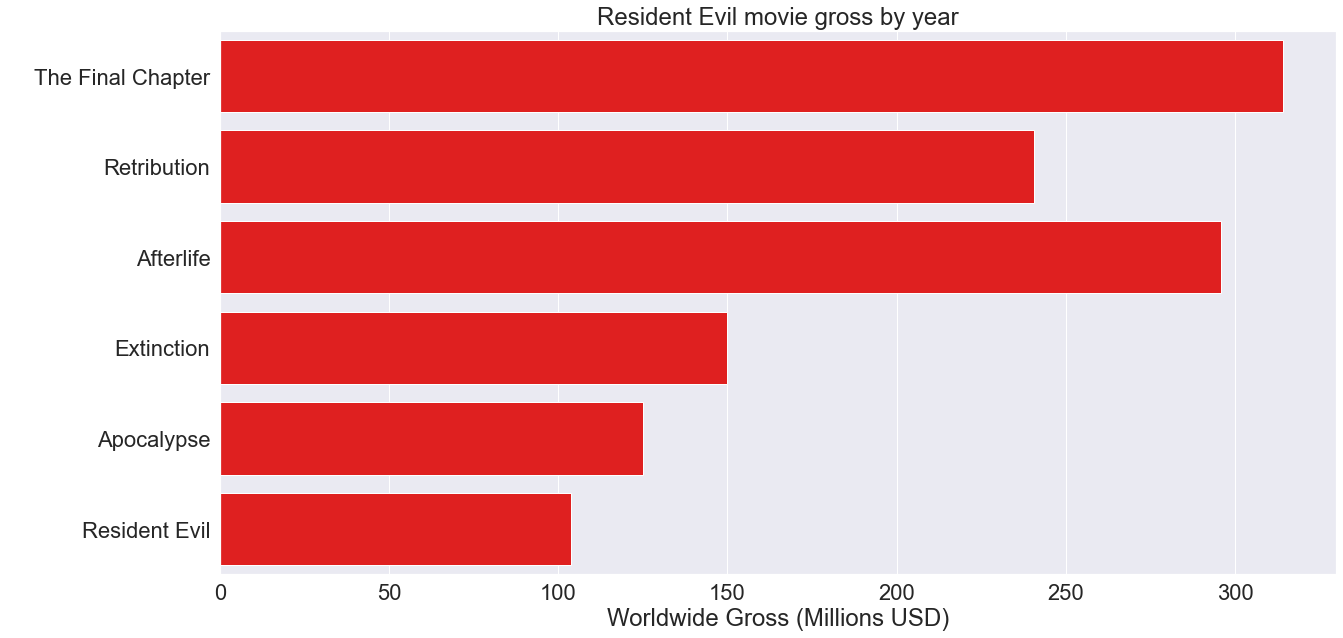

In [107]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="ww_gross", y="title", data=re_fran_yr, color='red')
plt.xlabel("Worldwide Gross (Millions USD)")
plt.ylabel(" ")
plt.title("Resident Evil movie gross by year")

That's not a bad looking graph, but I think I can do better. Let's try a line graph, that's always a fan favorite.

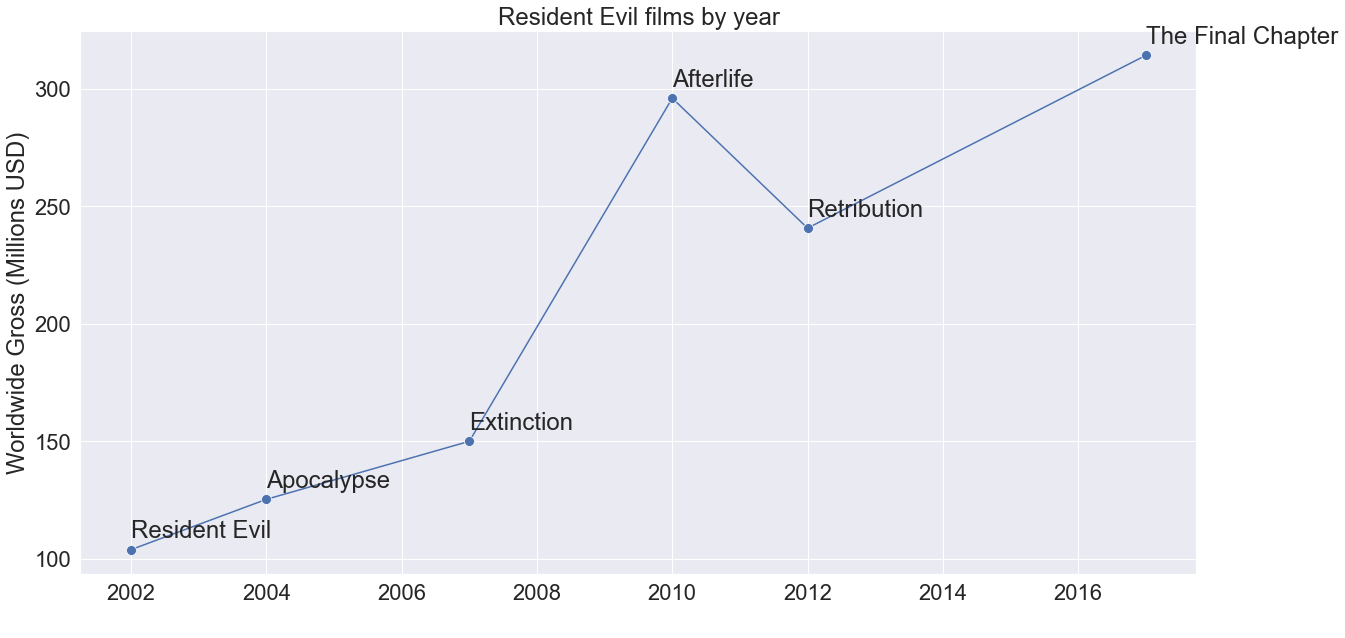

In [108]:
plt.figure(figsize=(20,10))
ax1=plt.gca()
sb.lineplot(x="year", y="ww_gross", marker='o',data=re_fran_yr,markersize=10)

for row in re_fran_yr.index:
    name=re_fran_yr['title'][row]
    x=re_fran_yr['year'][row]
    y=re_fran_yr['ww_gross'][row]
    ax1.annotate(name,(x,y+5))

plt.xlabel("  ")
plt.title("Resident Evil films by year")
plt.ylabel("Worldwide Gross (Millions USD)")
plt.show()

Aside from 1 outlier, there is a clear trend that the Resident Evil movies made more money with each chapter. In fact, every sequel made more than the original, and 4 out of 5 made more than the previous movie. This further solidifies my argument that sequels are the best way to make money in movies.

Ok, so let's keep working on sequels. Here, I've found a nice wikipedia article on sequels by box office performance. Let's read it and go through the standard formatting.

In [109]:
resp3= requests.get("https://en.wikipedia.org/wiki/List_of_film_sequels_by_box-office_performance")
soup3= bsoup(resp3.text)
seqs_table=soup3.find_all('table', {'class':'wikitable'})

In [111]:
seqs=seqs_table[2]
seq=pd.read_html(seqs.prettify())[0]
seq.head(10)

,Rank,Title,Year,Worldwide gross [49]
0,1,Avengers: Endgame,2019,"$2,797,800,564"
1,2,Star Wars: The Force Awakens,2015,"$2,068,223,624"
2,3,Avengers: Infinity War,2018,"$2,048,359,754"
3,4,Jurassic World,2015,"$1,671,713,208"
4,5,Furious 7,2015,"$1,516,045,911"
5,6,Frozen II,2019,"$1,450,026,933"
6,7,Avengers: Age Of Ultron,2015,"$1,402,805,868"
7,8,Harry Potter and the Deathly Hallows – Part 2,2011,"$1,342,025,430 [50]"
8,9,Star Wars: The Last Jedi,2017,"$1,332,539,889"
9,10,Jurassic World: Fallen Kingdom,2018,"$1,309,484,461"


So there's one problem with this, every so often there's a bracketed number appearing. We'll have to get rid of that. However, the first thing we'll do is get rid of the $.

In [ ]:
seq.set_index('Rank', inplace=True)

In [115]:
new_col=['title','year','Worldwide gross']
seq.columns=new_col
seq['Worldwide gross'] = seq['Worldwide gross'].replace('[\$,]', '', regex=True)

In [116]:
seq.head(15)

,title,year,Worldwide gross
Rank,,,
1,Avengers: Endgame,2019,2797800564
2,Star Wars: The Force Awakens,2015,2068223624
3,Avengers: Infinity War,2018,2048359754
4,Jurassic World,2015,1671713208
5,Furious 7,2015,1516045911
6,Frozen II,2019,1450026933
7,Avengers: Age Of Ultron,2015,1402805868
8,Harry Potter and the Deathly Hallows – Part 2,2011,1342025430 [50]
9,Star Wars: The Last Jedi,2017,1332539889


So the $ is gone, now we need to get rid of those bracketed numbers. The easiest way (to me anyway) would be just to overwrite those 2 with new numbers, instead of writing another function or for loop. But this program is about writing code, so let's try it that way. I'll go through the same steps when I was getting rid of the ranges of numbers. So step 1, let's see what it actually looks like.

In [118]:
seq['Worldwide gross'][8]

'1342025430  [50]'

In [119]:
seq['Worldwide gross'][8].split(' ')

['1342025430', '', '[50]']

Splitting it at the space seems like the smart way to go. So again it creates a list, I can just take the first element of that list, and put that into the dataframe. Seems simple enough.

In [120]:
bleh=seq['Worldwide gross'][8].split(' ')

I ran out of good variable names.

In [121]:
bleh[0]

'1342025430'

So now to put it back where we got it in the dataframe. I bet we'll get a warning.

In [122]:
seq['Worldwide gross'][8]=bleh[0]

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Told you.

In [123]:
seq

,title,year,Worldwide gross
Rank,,,
1,Avengers: Endgame,2019,2797800564
2,Star Wars: The Force Awakens,2015,2068223624
3,Avengers: Infinity War,2018,2048359754
4,Jurassic World,2015,1671713208
5,Furious 7,2015,1516045911
6,Frozen II,2019,1450026933
7,Avengers: Age Of Ultron,2015,1402805868
8,Harry Potter and the Deathly Hallows – Part 2,2011,1342025430
9,Star Wars: The Last Jedi,2017,1332539889


But again, it worked. So I'll write another simple function to take the variable, and if it contains a bracket, it'll split it into a list, then return the first element of the list as a float.

In [124]:
def change2 (var1):
    if '[' in var1:
        bleh=var1.split(' ')
        numb=bleh[0]
        numbf=float(numb)
    else:
        numbf=float(var1)
    return numbf

In [125]:
seq['Worldwide gross'] = seq['Worldwide gross'].map(change2)

In [126]:
seq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            30 non-null     object 
 1   year             30 non-null     int64  
 2   Worldwide gross  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [127]:
seq.head()

,title,year,Worldwide gross
Rank,,,
1,Avengers: Endgame,2019,2.797801e+09
2,Star Wars: The Force Awakens,2015,2.068224e+09
3,Avengers: Infinity War,2018,2.048360e+09
4,Jurassic World,2015,1.671713e+09
5,Furious 7,2015,1.516046e+09


In [128]:
seq['Worldwide gross'] = seq['Worldwide gross']/1000000

We have another very nice dataframe with pretty manageable numbers. So let's get graphing. First, let's make a new dataframe of just the top fifteen titles:

In [130]:
seq_tf=seq.head(15)

Text(0.5, 1.0, '15 Highest Grossing Sequels')

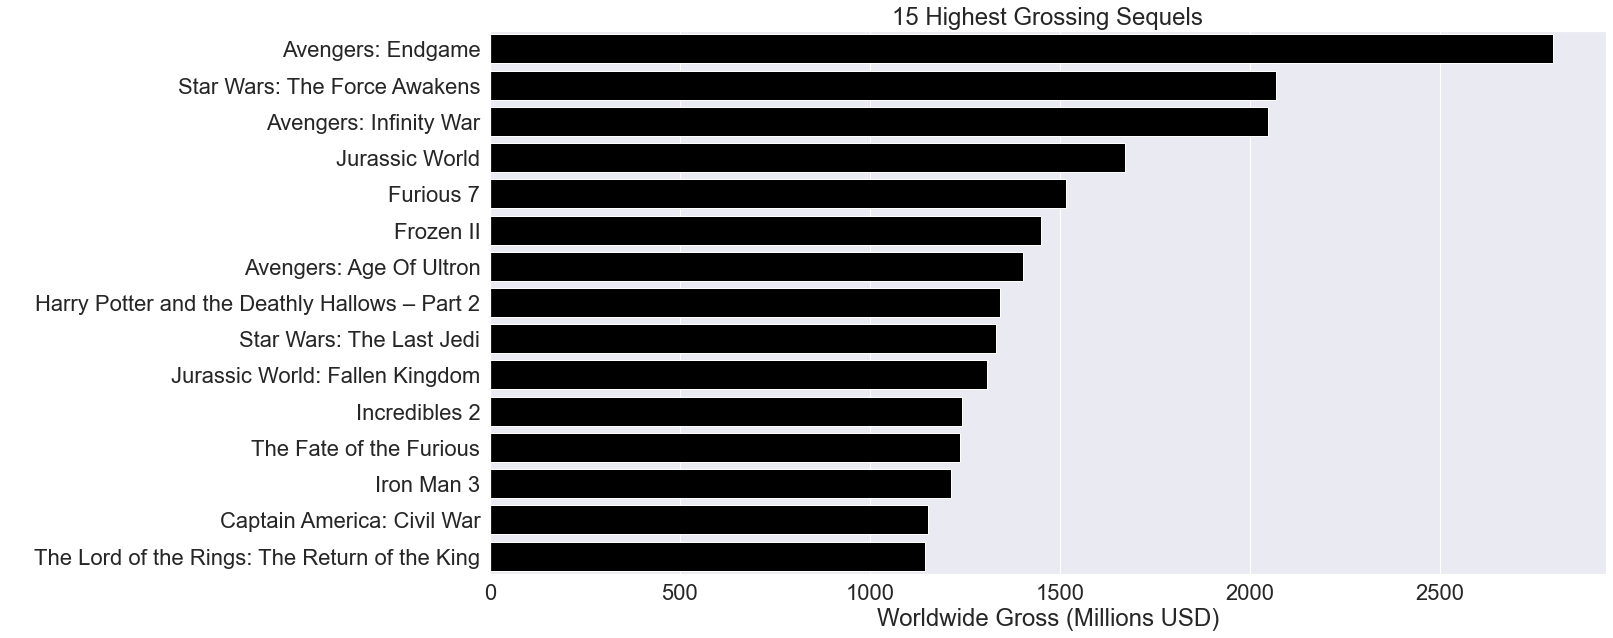

In [131]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="title", data=seq_tf, color='black')
plt.xlabel("Worldwide Gross (Millions USD)")
plt.ylabel(" ")
plt.title("15 Highest Grossing Sequels")

So not only does this show that sequels are profitable, several of these movies (12 of 15) are not the first sequel, or the second in the series, however you want to look at it. So I think that should be enough data for a minimum viable product. I have several visualizations, and I think I've made a pretty convincing point.

So for some future considerations: I would like to look into how comparably storied movies do against each other (Armageddon vs Deep Impact, White House Down vs Olympas has Fallen, etc.) because I'm concerned that an Elder Scrolls movie, or series, would be seen as too similar to The Witcher. I'd also like to look at how the Star Wars movies have done over time, I'm betting it'll be similar to the Resident Evil graph. Maybe do that for the James Bond movies as well. Then of course there are issues of writers, directors and producers. But so much of that data is skewed by 1 or 2 giant movies, or by having a giant library of films. So alot of parsing or normalizing of the data would need to happen.

## First Revision

After the initial draft was presented, it was decided more data was needed. Specifically, genre data. So let's find some, and merge it with some of our other data.
So I found a nice website with some movie gross by genre, so let's do some more webscrapping:

In [132]:
resp4=requests.get("https://www.the-numbers.com/market/genres")
soup4= bsoup(resp4.text)

In [133]:
tops_genre=soup4.find('table')

In [134]:
genre_tops=pd.read_html(tops_genre.prettify())[0]

In [135]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1097,"$64,419,735,727",9204527552,27.19%
1,2,Action,1091,"$48,768,794,422",6855394274,20.59%
2,3,Drama,5464,"$35,573,179,868",5434327273,15.02%
3,4,Comedy,2414,"$33,693,959,268",5165269899,14.22%
4,5,Thriller/Suspense,1183,"$19,782,929,944",2876990965,8.35%
5,6,Horror,712,"$13,324,220,246",1906858034,5.62%
6,7,Romantic Comedy,626,"$10,461,480,454",1688880351,4.42%
7,8,Musical,201,"$4,287,703,574",567867711,1.81%
8,9,Documentary,2408,"$2,517,020,001",375875302,1.06%
9,10,Black Comedy,213,"$2,185,433,323",319798811,0.92%


Ok, so this data is awesomely clean, so I don't think I need to do much here. I can probably do a graph, and get some figures on gross per movie. But I need to merge something with something else. So let's find something.

In [136]:
resp5=requests.get("https://www.the-numbers.com/box-office-records/worldwide/all-movies/genres/")

In [137]:
soup5= bsoup(resp5.text)

In [138]:
ww_genre=soup5.find('table')

In [139]:
genre_ww=pd.read_html(ww_genre.prettify())[0]

In [140]:
genre_ww

,Record,No 1. Movie,Amount
0,Top Adventure Worldwide,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817"
1,Top Action Worldwide,Avatar,"$2,845,899,541"
2,Top Comedy Worldwide,The Hangover Part II,"$586,764,305"
3,Top Drama Worldwide,Titanic,"$2,207,986,545"
4,Top Thriller/Suspense Worldwide,Joker,"$1,072,507,517"
5,Top Horror Worldwide,It,"$701,083,042"
6,Top Romantic Comedy Worldwide,Mei Ren Yu,"$525,018,479"
7,Top Musical Worldwide,Frozen,"$1,265,778,169"
8,Top Black Comedy Worldwide,The Wolf of Wall Street,"$389,918,903"
9,Top Western Worldwide,Django Unchained,"$449,841,566"


Well, it does look like most of the work is done for us. I was thinking about adding a genre column to my highest grossing movies table.

In [141]:
top_fifteen

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avatar,2847.246203,2009
1,2,1,Avengers: Endgame,2797.501328,2019
2,3,1,Titanic,2187.425379,1997
3,4,3,Star Wars: The Force Awakens,2068.223624,2015
4,5,4,Avengers: Infinity War,2048.359754,2018
5,6,3,Jurassic World,1671.713208,2015
6,7,7,The Lion King,1656.943394,2019
7,8,3,The Avengers,1518.812988,2012
8,9,4,Furious 7,1516.045911,2015
9,10,10,Frozen II,1450.026933,2019


So I managed to find a number of lists of movies belonging to a particular genre. This is going to be a lot more work than I expected, but c'est la vie.

In [142]:
resp6=requests.get("https://www.the-numbers.com/market/genre/Drama")
soup6= bsoup(resp6.text)
tbl_drama=soup6.find('table')
drama=pd.read_html(tbl_drama.prettify())[0]

I think I can get away with just using the top 5, since only 1 of these movies appears in my top 15.

In [143]:
drama5=drama.head()
drama5

,Rank,Movie,Release Date,Theatrical Distributor,MPAA Rating,Total Gross,Inflation-Adjusted Gross
0,1,Titanic,"Dec 19, 1997",Paramount Pictures,PG-13,"$659,363,944","$1,247,410,568"
1,2,The Passion of the Christ,"Feb 25, 2004",Newmarket Films,R,"$370,782,930","$546,896,353"
2,3,Saving Private Ryan,"Jul 24, 1998",Dreamworks SKG,R,"$216,335,085","$418,661,794"
3,4,American Sniper,"Dec 25, 2014",Warner Bros.,R,"$350,126,372","$380,522,815"
4,5,Apollo 13,"Jun 30, 1995",Universal,PG,"$173,772,767","$364,980,905"


Ok,so I'm kind of at a dead end looking for genres, but what I can do, is work with some of the data I have. Namely the genre box office numbers.

In [144]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1097,"$64,419,735,727",9204527552,27.19%
1,2,Action,1091,"$48,768,794,422",6855394274,20.59%
2,3,Drama,5464,"$35,573,179,868",5434327273,15.02%
3,4,Comedy,2414,"$33,693,959,268",5165269899,14.22%
4,5,Thriller/Suspense,1183,"$19,782,929,944",2876990965,8.35%
5,6,Horror,712,"$13,324,220,246",1906858034,5.62%
6,7,Romantic Comedy,626,"$10,461,480,454",1688880351,4.42%
7,8,Musical,201,"$4,287,703,574",567867711,1.81%
8,9,Documentary,2408,"$2,517,020,001",375875302,1.06%
9,10,Black Comedy,213,"$2,185,433,323",319798811,0.92%


In [145]:
genre_tops['Total Box Office'] = genre_tops['Total Box Office'].replace('[\$,]', '', regex=True)
genre_tops['Total Box Office'] = genre_tops['Total Box Office'].astype(float)
genre_tops['Total Box Office'] = genre_tops['Total Box Office']/1000000

In [146]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1097,64419.735727,9204527552,27.19%
1,2,Action,1091,48768.794422,6855394274,20.59%
2,3,Drama,5464,35573.179868,5434327273,15.02%
3,4,Comedy,2414,33693.959268,5165269899,14.22%
4,5,Thriller/Suspense,1183,19782.929944,2876990965,8.35%
5,6,Horror,712,13324.220246,1906858034,5.62%
6,7,Romantic Comedy,626,10461.480454,1688880351,4.42%
7,8,Musical,201,4287.703574,567867711,1.81%
8,9,Documentary,2408,2517.020001,375875302,1.06%
9,10,Black Comedy,213,2185.433323,319798811,0.92%


In [147]:
genre_tops["Gross/Title"]=genre_tops["Total Box Office"]/genre_tops["Movies"]

In [148]:
genre_tops_per=genre_tops.sort_values(by=["Gross/Title"],ascending=False)
genre_tops_per

,Rank,Genre,Movies,Total Box Office,Tickets,Share,Gross/Title
0,1,Adventure,1097,64419.735727,9204527552,27.19%,58.723551
1,2,Action,1091,48768.794422,6855394274,20.59%,44.701003
7,8,Musical,201,4287.703574,567867711,1.81%,21.331859
5,6,Horror,712,13324.220246,1906858034,5.62%,18.713792
4,5,Thriller/Suspense,1183,19782.929944,2876990965,8.35%,16.722680
6,7,Romantic Comedy,626,10461.480454,1688880351,4.42%,16.711630
3,4,Comedy,2414,33693.959268,5165269899,14.22%,13.957730
10,11,Western,93,1292.593149,187665395,0.55%,13.898851
9,10,Black Comedy,213,2185.433323,319798811,0.92%,10.260250
2,3,Drama,5464,35573.179868,5434327273,15.02%,6.510465


Text(0.5, 1.0, 'Highest Grossing Genres per Movie')

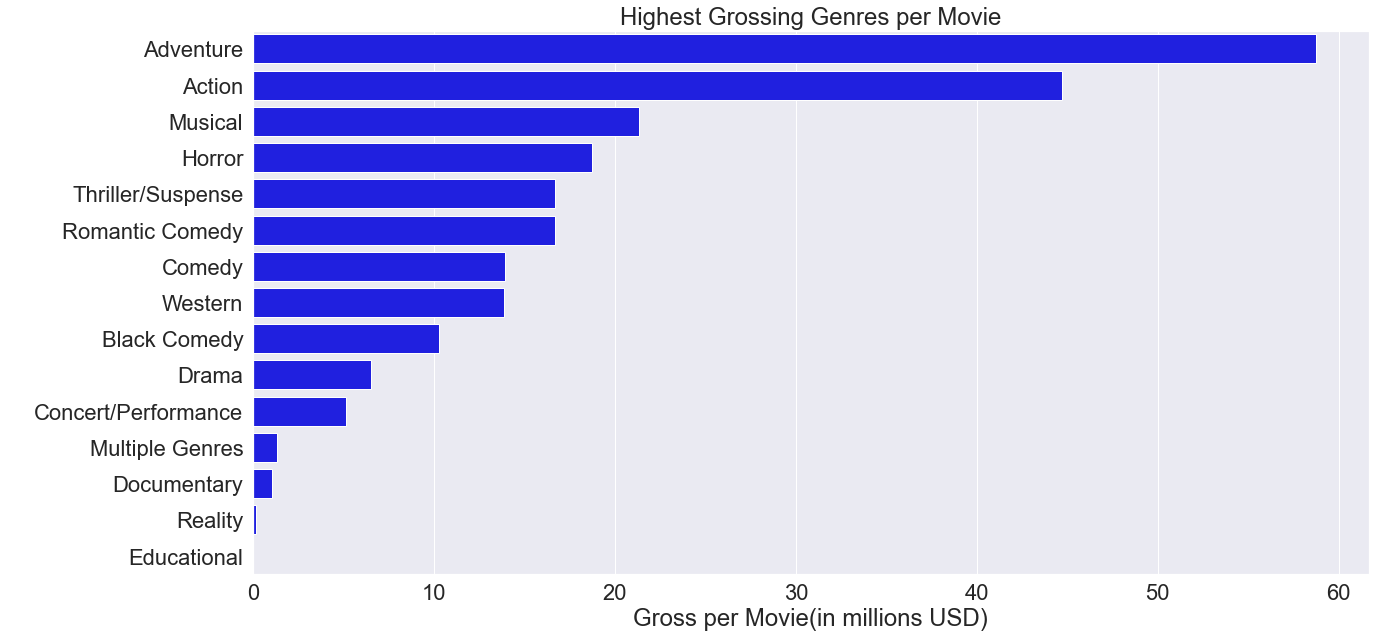

In [149]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Gross/Title", y="Genre", data=genre_tops_per, color='blue')
plt.xlabel("Gross per Movie(in millions USD)")
plt.ylabel(" ")
plt.title("Highest Grossing Genres per Movie")

# Getting some BIG datasets

Upon more guidance, I've been advised to look deeper into the IMDB data, to "take a huge dataset and tease out trends". Let's see what we can do.

In [150]:
imdb_rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [151]:
imdb_rat.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [152]:
imdb_rat_top=imdb_rat.sort_values(by=["averagerating"],ascending=False)

In [153]:
imdb_rat_top.head(10)

,tconst,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6
7017,tt6295832,10.0,5
56819,tt10378660,10.0,5
64754,tt7227500,10.0,6
6784,tt5390098,10.0,5
45335,tt6991826,10.0,5


So what can we tease out of here? First thing, we should establish some legitimacy criteria. For instance: if it has less than, say 10,000 votes it shouldn't be considered.

In [154]:
imdb_rat.loc[imdb_rat['numvotes']>10000]

,tconst,averagerating,numvotes
3,tt1043726,4.2,50352
16,tt1210166,7.6,326657
17,tt1212419,6.5,87288
19,tt1229238,7.4,428142
20,tt1232829,7.2,477771
...,...,...,...
73543,tt6990206,7.0,32800
73548,tt7008872,7.0,18768
73552,tt7048622,7.7,11168
73600,tt7315484,5.2,22399


So we have over 2500 results left. From 73000 that's a nice slice. Let's go a bit further:20000 votes and a rating higher than 7.5.

In [155]:
imdb_rat.loc[(imdb_rat['numvotes']>20000) & (imdb_rat['averagerating']>7.5)]

,tconst,averagerating,numvotes
16,tt1210166,7.6,326657
107,tt1535109,7.8,387402
193,tt1663202,8.0,621193
595,tt8108198,8.5,43409
758,tt1201607,8.1,691835
...,...,...,...
72520,tt6644200,7.6,305031
72557,tt0780504,7.8,521495
72597,tt1899353,7.6,175968
72956,tt2386490,7.6,60769


Much more manageable. Still, I don't like that tconst, so I'm going to do a little more research and see if I can get rid of it. And I did.

In [157]:
imdb_aka=pd.read_csv('Data/title.akas.tsv.gz', delimiter = '\t')

D:\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [158]:
imdb_aka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29291917 entries, 0 to 29291916
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 1.7+ GB


In [159]:
imdb_aka.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


Ok, so I think we can trim this down....a lot. First thing's first: region. Let's just assume American films will be in the US region.

In [160]:
imdb_aka.loc[imdb_aka['region']=='US']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
35,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
39,tt0000005,5,Blacksmith Scene #1,US,\N,alternative,\N,0
40,tt0000005,6,Blacksmithing,US,\N,\N,informal alternative title,0
...,...,...,...,...,...,...,...,...
29291624,tt9916720,10,The Demonic Nun,US,\N,tv,\N,0
29291626,tt9916720,12,The Nun 2,US,\N,imdbDisplay,\N,0
29291641,tt9916734,1,Manca: Peleo,US,\N,imdbDisplay,\N,0
29291645,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


Not exactly helpful, since I've never heard of any of those movies, which is saying something. So let's look for a movie I DO know.

In [161]:
imdb_aka.loc[(imdb_aka['title']=='Avengers: Endgame') & (imdb_aka['region']=='US')]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
20312111,tt4154796,29,Avengers: Endgame,US,\N,imdbDisplay,\N,0
20312117,tt4154796,34,Avengers: Endgame,US,en,\N,\N,0


OKAY! Now we're getting somewhere. So I want to trim this list down to region=US, and language=en, I'll make it its own dataframe.

In [162]:
imdb_name=imdb_aka.loc[(imdb_aka['region']=='US') & (imdb_aka['language']=='en')]

In [163]:
imdb_name.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
882,tt0000211,12,A Trip to the Moon,US,en,\N,\N,0
3277,tt0000969,10,Les Misérables,US,en,\N,\N,0
17037,tt0005809,7,The Governor,US,en,\N,\N,0
24954,tt0008305,10,Les Misérables,US,en,\N,\N,0
30711,tt0009968,20,Broken Blossoms,US,en,\N,\N,0


Much better.down to 2149 movies. So I want to merge these dataframes. A small problem, column names 'tconst' and 'titleId', so I'll change that column name in the rating dataframe. But first, let's dump the columns I don't want.

In [164]:
imdb_name.drop('types',axis=1,inplace=True)
imdb_name.drop('attributes',axis=1,inplace=True)
imdb_name.drop('isOriginalTitle',axis=1,inplace=True)

D:\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [165]:
imdb_name.head()

,titleId,ordering,title,region,language
882,tt0000211,12,A Trip to the Moon,US,en
3277,tt0000969,10,Les Misérables,US,en
17037,tt0005809,7,The Governor,US,en
24954,tt0008305,10,Les Misérables,US,en
30711,tt0009968,20,Broken Blossoms,US,en


In [166]:
imdb_rat.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [167]:
new_names=['titleId', 'avg rating', 'num votes']
imdb_rat.columns=new_names
imdb_rat.head()

,titleId,avg rating,num votes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Perfect, now we have a shared column we can merge on.

In [169]:
imdb=pd.merge(imdb_name,imdb_rat,how='left', on=['titleId'])

In [171]:
imdb.head()

,titleId,ordering,title,region,language,avg rating,num votes
0,tt0000211,12,A Trip to the Moon,US,en,NaN,NaN
1,tt0000969,10,Les Misérables,US,en,NaN,NaN
2,tt0005809,7,The Governor,US,en,NaN,NaN
3,tt0008305,10,Les Misérables,US,en,NaN,NaN
4,tt0009968,20,Broken Blossoms,US,en,NaN,NaN


In [172]:
imdb.sort_values(by=["num votes"],ascending=False)

,titleId,ordering,title,region,language,avg rating,num votes
1126,tt1375666,31,Inception,US,en,8.8,1841066.0
1170,tt1431045,6,Deadpool,US,en,8.0,820847.0
1065,tt1300854,20,Iron Man 3,US,en,7.2,692794.0
1978,tt4154756,13,Avengers: Infinity War,US,en,8.5,670926.0
1007,tt1270798,39,X-Men: First Class,US,en,7.7,608930.0
...,...,...,...,...,...,...,...
2614,tt9905020,3,Alice Cooper: Welcome to My Nightmare (Music V...,US,en,NaN,NaN
2615,tt9909874,3,Halloween: Resurrection - On the Set with Jami...,US,en,NaN,NaN
2616,tt9909916,9,Halloween: Resurrection - Tour of Set with Pro...,US,en,NaN,NaN
2617,tt9909954,7,Halloween: Resurrection - Head Cam Featurette,US,en,NaN,NaN


Next will be to dump all the rows with no ratings and the ones with no votes.

In [174]:
imdb.dropna(subset=['avg rating', 'num votes'],inplace=True)

In [175]:
imdb

,titleId,ordering,title,region,language,avg rating,num votes
319,tt0285252,8,Bachelor Trip,US,en,3.9,219.0
416,tt0437086,18,Alita: Battle Angel,US,en,7.5,88207.0
429,tt0451279,20,Wonder Woman,US,en,7.5,487527.0
433,tt0455944,48,The Equalizer,US,en,7.2,302302.0
446,tt0469021,12,Alan Partridge,US,en,6.9,27986.0
...,...,...,...,...,...,...,...
2588,tt9497120,1,Semiconductor,US,en,3.8,6.0
2591,tt9558612,8,PM Narendra Modi,US,en,3.7,4057.0
2597,tt9600932,4,The Brink,US,en,6.2,107.0
2601,tt9626278,7,Fourteen,US,en,6.7,74.0


We're now down to 500 movies. So let's look at the movies that have a high rating, and high vote number.

In [176]:
imdb_hi_vote=imdb.loc[(imdb['num votes']>= 100000)]

In [178]:
imdb_hi_vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 429 to 2283
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titleId     45 non-null     object 
 1   ordering    45 non-null     int64  
 2   title       45 non-null     object 
 3   region      45 non-null     object 
 4   language    45 non-null     object 
 5   avg rating  45 non-null     float64
 6   num votes   45 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.8+ KB


45 movies. Sweet. Let's sort that by avg rating, and see what we got.

In [179]:
imdb_hi_vote.sort_values(by=["num votes"],ascending=False).head(15)

,titleId,ordering,title,region,language,avg rating,num votes
1126,tt1375666,31,Inception,US,en,8.8,1841066.0
1170,tt1431045,6,Deadpool,US,en,8.0,820847.0
1065,tt1300854,20,Iron Man 3,US,en,7.2,692794.0
1978,tt4154756,13,Avengers: Infinity War,US,en,8.5,670926.0
1007,tt1270798,39,X-Men: First Class,US,en,7.7,608930.0
1133,tt1386697,19,Suicide Squad,US,en,6.0,533039.0
561,tt0948470,11,Spiderman,US,en,7.0,525632.0
1501,tt1825683,27,Black Panther,US,en,7.3,516148.0
429,tt0451279,20,Wonder Woman,US,en,7.5,487527.0
1894,tt3501632,4,Thor: Ragnarok,US,en,7.9,482995.0


In [180]:
imdb_15=imdb_hi_vote.sort_values(by=["avg rating"],ascending=False).head(15)
imdb_15

,titleId,ordering,title,region,language,avg rating,num votes
1126,tt1375666,31,Inception,US,en,8.8,1841066.0
1979,tt4154796,34,Avengers: Endgame,US,en,8.8,441135.0
1978,tt4154756,13,Avengers: Infinity War,US,en,8.5,670926.0
2028,tt4633694,32,Spider-Man: Into the Spider-Verse,US,en,8.5,210869.0
1599,tt2106476,29,The Hunt,US,en,8.3,242765.0
1170,tt1431045,6,Deadpool,US,en,8.0,820847.0
1513,tt1856101,28,Blade Runner 2049,US,en,8.0,376241.0
486,tt0790636,3,The Dallas Buyers Club,US,en,8.0,402462.0
2069,tt5013056,33,Dunkirk,US,en,7.9,466580.0
1894,tt3501632,4,Thor: Ragnarok,US,en,7.9,482995.0


Ok, so now we have a nice 15 element dataframe. BTW, The Hunt which is rated 5 on this list, made a whopping 15 million, on a budget of 14 million (netting a cool mil). I was told I needed to suss out some data from a large dataset, I took a dataset that was 1.5 GB, and trimmed it down to 15 titles. So I hope I've got enough done to pass this phase. Fingers crossed.